<a href="https://colab.research.google.com/github/aka-nahal/dt-i-cu/blob/main/Air_quality_prediction_9(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ambient Air Quality Monitoring**

Ambient Air Quality monitoring or testing is a process of measurement of pollutants present in the atmosphere. It ensures the safety of our environment and follows the regulatory guidelines for smooth functioning of your business.

**Ambient Air Quality Monitoring or Testing Parameters**

Under N.A.M.P., 12 air pollutants viz., Sulphur Dioxide (SO2), Oxides of Nitrogen as NO2 and Particulate Matter (PM10) and Particulate Matter (PM2.5), Ozone (O3), Lead (Pb), Carbon Monoxide (CO), Ammonia (Nh3), Benzene (C6H6), Benzo-Pyrene (BaP), Arsenic (As), Nikhel (Ni) have been identified for regular monitoring at required the locations/ Industrial unit.

Among all these parameters Particulate matter is the most important pollutant present in the atmosphere. It is also called as Particulate matter Monitoring or Dust Monitoring.

**Here is the common guideline defined by CPCB and for some parameters, limit specified for industry type;**

Particulate matter 10 (100µg/m3)

PM2.5 (60µg/m3)

No2 (80 µg/m3)

So2 (80 µg/m3)

Ammonia( 400 µg/m3)

Formaldehyde(0.5 µg/m3)

Ozone (100 µg/m3)

Benzene (5 µg/m3

Benzopyrene 1 ng/m3

Lead 1 µg/m3

Arsenic 06 ng/m3,

Nickel 20ng/m3,

CO (4µg/m3)

In [ ]:
## importing packages
import numpy as np
import pandas as pd

In [ ]:
PATH_STATIONS = "/content/stations.csv"
PATH_STATION_HOUR = "/content/station_hour.csv"
PATH_STATION_DAY = "/content/station_day.csv"
PATH_CITY_HOUR = "/content/city_hour.csv"
PATH_CITY_DAY = "/content/city_day.csv"

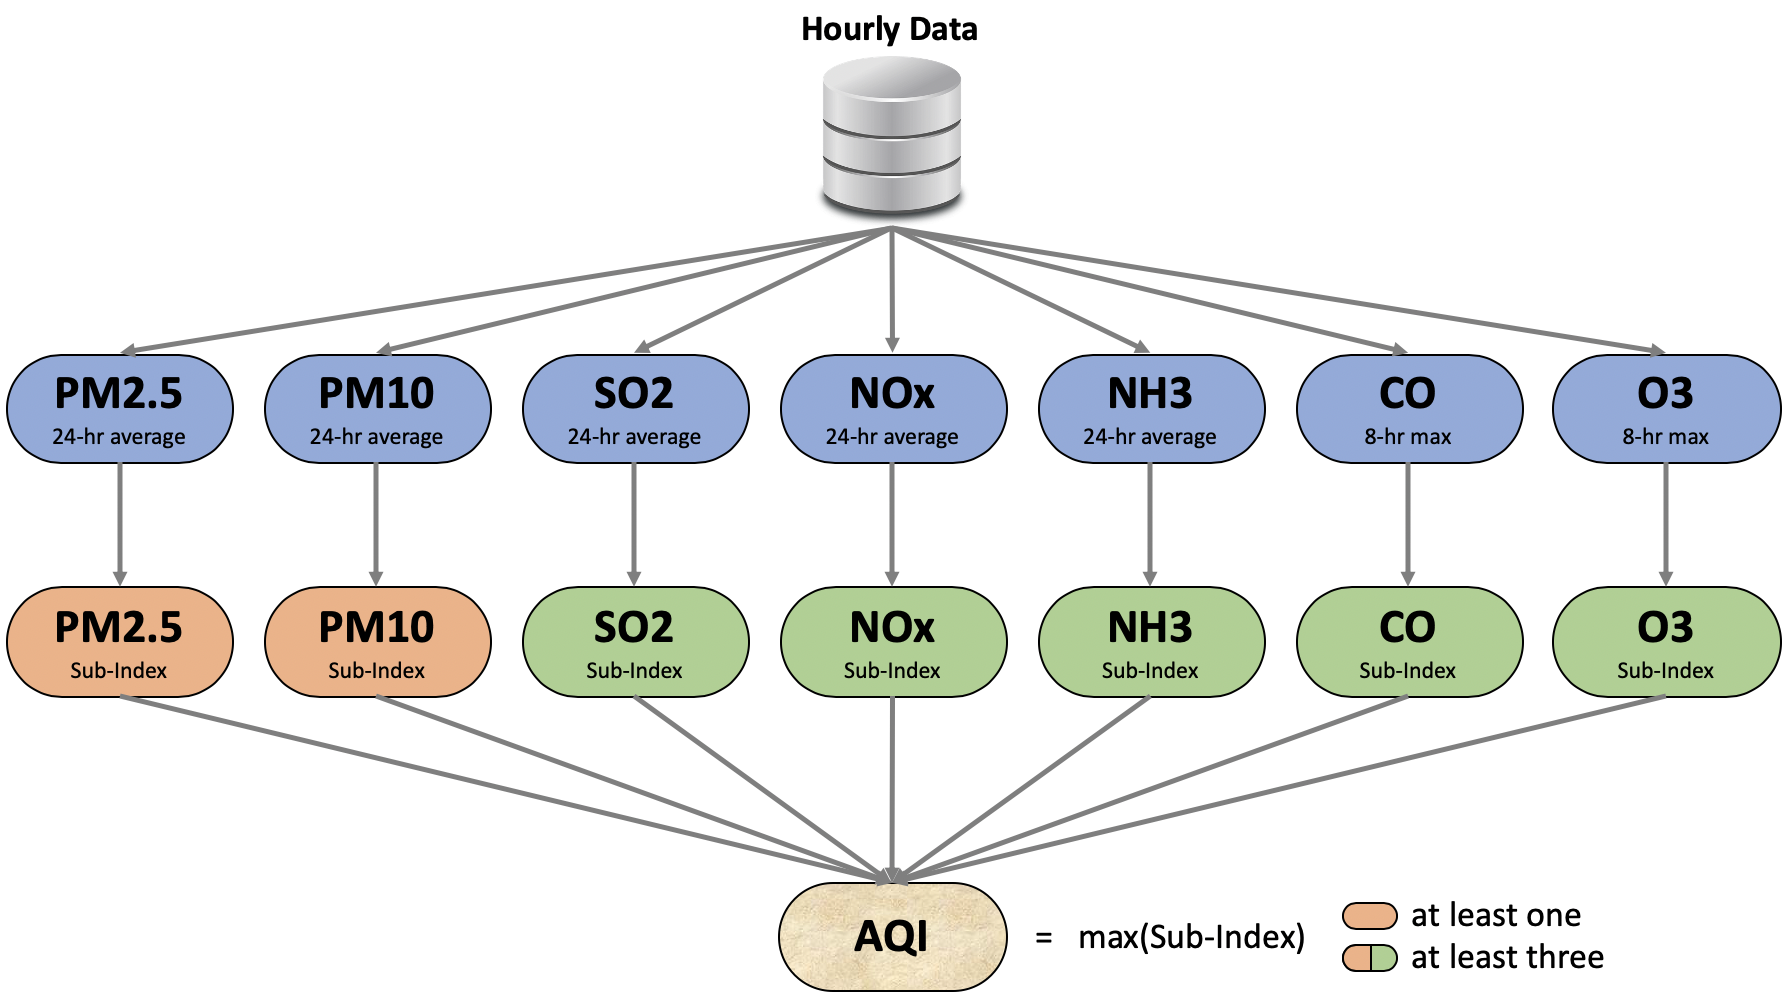

The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3.


For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.


For CO and O3 the maximum value in last 8-hrs is used.
Each measure is converted into a Sub-Index based on pre-defined groups.


Sometimes measures are not available due to lack of measuring or lack of required data points.


Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

In [ ]:
## importing data and subsetting the station
df = pd.read_csv(PATH_STATION_HOUR, parse_dates = ["Datetime"])
stations = pd.read_csv(PATH_STATIONS)

df = df.merge(stations, on = "StationId")
#df = df[df.StationId.isin(stations)]
df.sort_values(["StationId", "Datetime"], inplace = True)
df["Date"] = df.Datetime.dt.date.astype(str)
df.Datetime = df.Datetime.astype(str)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status,Date
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,...,0.1,6.10,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-24
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,...,0.1,6.25,0.15,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-24
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,...,0.2,5.98,0.18,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-24
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,...,0.2,6.72,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-24
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,...,0.2,5.75,0.08,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-24


In [ ]:
df["PM10_24hr_avg"] = df.groupby("StationId")["PM10"].rolling(window = 24, min_periods = 16).mean().values
df["PM2.5_24hr_avg"] = df.groupby("StationId")["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
df["SO2_24hr_avg"] = df.groupby("StationId")["SO2"].rolling(window = 24, min_periods = 16).mean().values
df["NOx_24hr_avg"] = df.groupby("StationId")["NOx"].rolling(window = 24, min_periods = 16).mean().values
df["NH3_24hr_avg"] = df.groupby("StationId")["NH3"].rolling(window = 24, min_periods = 16).mean().values
df["CO_8hr_max"] = df.groupby("StationId")["CO"].rolling(window = 8, min_periods = 1).max().values
df["O3_8hr_max"] = df.groupby("StationId")["O3"].rolling(window = 8, min_periods = 1).max().values

**PM2.5 (Particulate Matter 2.5-micrometer)**

PM2.5 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [ ]:
# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

**PM10 (Particulate Matter 10-micrometer)**

PM10 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [ ]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

**SO2 (Sulphur Dioxide)**

SO2 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [ ]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

**NOx (Any Nitric x-oxide)**

NOx is measured in ppb (parts per billion). The predefined groups are defined in the function below:

In [ ]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

**NH3 (Ammonia)**

NH3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [ ]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

**CO (Carbon Monoxide)**

CO is measured in mg / m3 (milligrams per cubic meter of air). The predefined groups are defined in the function below:

In [ ]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

**O3 (Ozone or Trioxygen)**

O3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [ ]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

AQI
The final AQI is the maximum Sub-Index among the available sub-indices with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

There is no theoretical upper value of AQI but its rare to find values over 1000.

The pre-defined buckets of AQI are as follows:
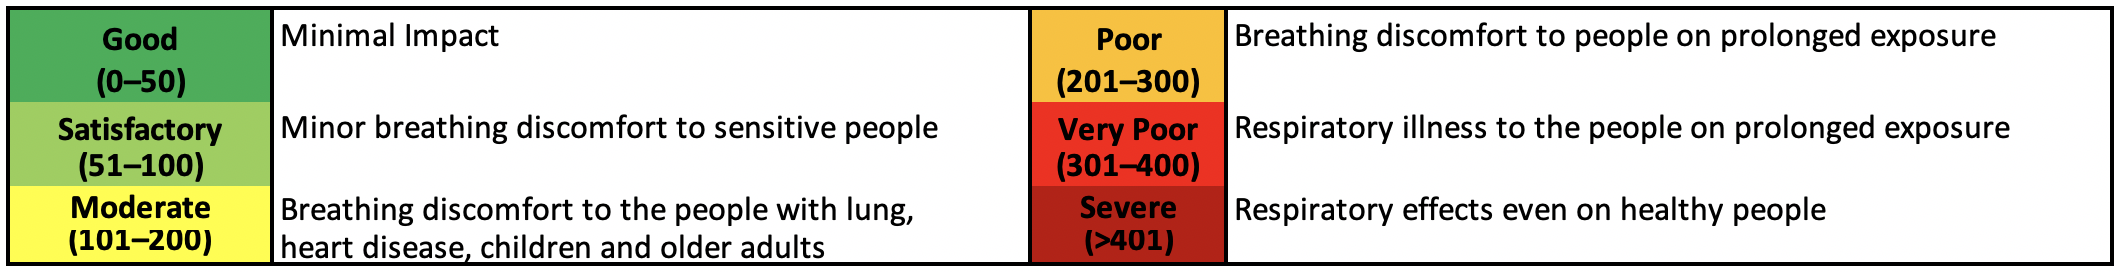

In [ ]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
      print("Good")
      return "Good"
    elif x <= 100:
      print("Satisfactory")
      return "Satisfactory"
    elif x <= 200:
      print("Moderate")
      return "Moderate"
    elif x <= 300:
      print("Poor")
      return "Poor"
    elif x <= 400:
      print("Very Poor")
      return "Very Poor"
    elif x > 400:
      print("Severe")
      return "Severe"
    else:
      print("np.NaN")
      return np.NaN

df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["NOx_SubIndex"] > 0).astype(int) + \
                (df["NH3_SubIndex"] > 0).astype(int) + \
                (df["CO_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int) #astype(int)method is used to cast a pandas object to a specified dtype.

df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df[~df.AQI_calculated.isna()].head(10)


Streaming output truncated to the last 5000 lines.
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Mode

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
16,AP001,2017-11-25 09:00:00,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,...,155.468750,112.562500,14.349219,15.366406,2.844844,5.0,125.911765,7,155.0,Moderate
17,AP001,2017-11-25 10:00:00,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,...,158.970588,113.470588,14.755147,15.179412,2.819412,5.0,153.279412,7,159.0,Moderate
18,AP001,2017-11-25 11:00:00,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,...,159.907407,113.703704,15.004861,14.965972,2.797500,5.0,173.411765,7,173.0,Moderate
19,AP001,2017-11-25 12:00:00,79.00,124.00,5.30,21.15,15.53,9.40,0.1,NaN,...,160.087719,113.824561,15.004861,15.200000,2.773947,5.0,183.529412,7,184.0,Moderate
20,AP001,2017-11-25 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,160.087719,113.824561,15.004861,15.200000,2.773947,5.0,183.529412,7,184.0,Moderate
21,AP001,2017-11-25 14:00:00,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,...,158.500000,113.700000,15.649342,14.961875,2.727750,5.0,190.735294,7,191.0,Moderate
22,AP001,2017-11-25 15:00:00,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,...,157.182540,113.436508,16.203125,14.698810,2.707976,5.0,190.735294,7,191.0,Moderate
23,AP001,2017-11-25 16:00:00,70.00,107.00,2.80,30.33,18.40,6.15,0.1,18.90,...,156.098485,113.037879,16.556548,15.076136,2.654773,5.0,190.735294,7,191.0,Moderate
24,AP001,2017-11-25 17:00:00,72.75,120.25,1.50,26.72,15.45,10.78,0.1,16.03,...,157.954545,113.712121,16.805357,14.917045,2.680682,5.0,190.735294,7,191.0,Moderate
25,AP001,2017-11-25 18:00:00,81.50,134.75,1.10,18.78,10.88,14.73,0.1,12.93,...,160.378788,114.424242,16.791071,14.678977,2.737045,5.0,190.735294,7,191.0,Moderate


In [ ]:
df[~df.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()

Satisfactory    14095
Moderate        13776
Good             4646
Poor             2979
Very Poor         712
Severe             14
Name: AQI_bucket_calculated, dtype: int64

**Day level**

To get AQI at day level, the AQI values are averaged over the hours of the day.

In [ ]:
df_station_hour = df
df_station_day = pd.read_csv(PATH_STATION_DAY)

df_station_day = df_station_day.merge(df.groupby(["StationId", "Date"])["AQI_calculated"].mean().reset_index(), on = ["StationId", "Date"])
df_station_day.AQI_calculated = round(df_station_day.AQI_calculated)
df_station_day.head(20)

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,AQI_calculated
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,184.0
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,197.0
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,198.0
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,188.0
5,AP001,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate,173.0
6,AP001,2017-11-30,69.80,114.86,4.69,20.17,14.54,10.95,0.12,14.07,118.09,0.16,3.52,0.06,165.0,Moderate,165.0
7,AP001,2017-12-01,73.96,113.56,4.58,19.29,13.97,10.95,0.10,13.90,123.80,0.17,2.85,0.04,191.0,Moderate,191.0
8,AP001,2017-12-02,89.90,140.20,7.71,26.19,19.87,13.12,0.10,19.37,128.73,0.25,2.79,0.07,191.0,Moderate,191.0
9,AP001,2017-12-03,87.14,130.52,0.97,21.31,12.12,14.36,0.15,11.41,114.80,0.23,3.82,0.04,227.0,Poor,227.0


**City level**

To get AQI at city level, the AQI values are averaged over stations of the city.

In [ ]:
df_city_hour = pd.read_csv(PATH_CITY_HOUR)
df_city_day = pd.read_csv(PATH_CITY_DAY)

df_city_hour["Date"] = pd.to_datetime(df_city_hour.Datetime).dt.date.astype(str)

df_city_hour = df_city_hour.merge(df.groupby(["City", "Datetime"])["AQI_calculated"].mean().reset_index(), on = ["City", "Datetime"])
df_city_hour.AQI_calculated = round(df_city_hour.AQI_calculated)

df_city_day = df_city_day.merge(df_city_hour.groupby(["City", "Date"])["AQI_calculated"].mean().reset_index(), on = ["City", "Date"])
df_city_day.AQI_calculated = round(df_city_day.AQI_calculated)
df_city_day.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,AQI_calculated
0,Amaravati,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN,NaN
1,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,184.0
2,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,197.0
3,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,198.0
4,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,188.0
5,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate,173.0
6,Amaravati,2017-11-30,69.80,114.86,4.69,20.17,14.54,10.95,0.12,14.07,118.09,0.16,3.52,0.06,165.0,Moderate,165.0
7,Amaravati,2017-12-01,73.96,113.56,4.58,19.29,13.97,10.95,0.10,13.90,123.80,0.17,2.85,0.04,191.0,Moderate,191.0
8,Amaravati,2017-12-02,89.90,140.20,7.71,26.19,19.87,13.12,0.10,19.37,128.73,0.25,2.79,0.07,191.0,Moderate,191.0
9,Amaravati,2017-12-03,87.14,130.52,0.97,21.31,12.12,14.36,0.15,11.41,114.80,0.23,3.82,0.04,227.0,Poor,227.0
